Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Implementation

In [3]:
data = pd.read_csv('diabetes.csv')

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0     

Text(0.5, 1.0, 'Distribution of Diabetes Outcome')

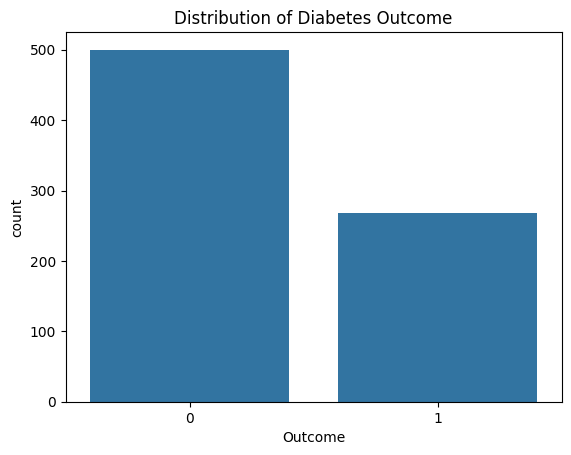

In [4]:
# Check for missing values
print(data.isnull().sum())
# Check the data types
print(data.dtypes)
# Check the first few rows of the dataset
print(data.head())
# Check the shape of the dataset
print(data.shape)
# Check the distribution of the target variable
print(data['Outcome'].value_counts(normalize=True))

# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')

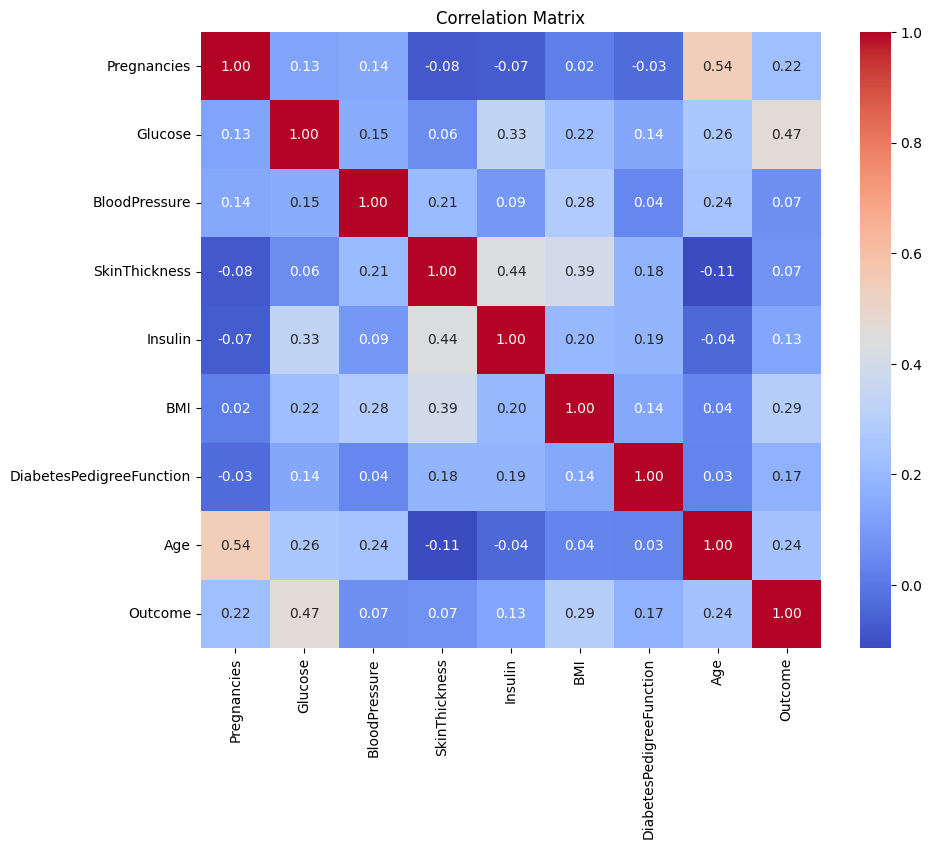

In [5]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Split the data into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the features
scalar = StandardScaler()
X = scalar.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)
# Fit the model to the training data
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



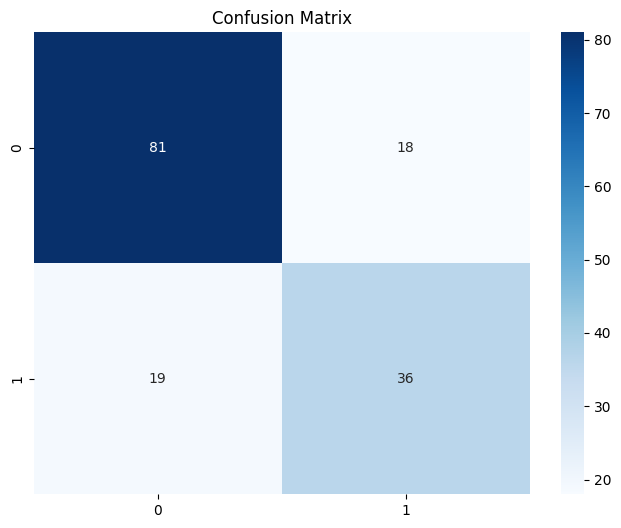

In [8]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Testing the model 

In [9]:
# This samle input data is used for prediction
# Example input data (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
# The result must be patient has diabetes cause this input data is taken from the dataset
# Sample input
input_data = (15, 136, 70, 32, 110, 37.1, 0.153, 43)

# Define the feature names in the same order as the training data
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data], columns=feature_names)

# Standardize the input data
input_scaled = scalar.transform(input_df)

# Make a prediction
prediction = model.predict(input_scaled)

# Output the result
if prediction[0] == 1:
    print("The model predicts that the patient **has diabetes**.")
else:
    print("The model predicts that the patient **does not have diabetes**.")

The model predicts that the patient **has diabetes**.
